# Introduction to Deep Learning with Tensorflow
<br><br><br>

##  Carlos Segura 
<b>
## Associate Researcher @ TID

## This slides: 
[http://crepe.hi.inet:8888](http://crepe.hi.inet:8888)
<br>
password: deeplearning
<br> 
Select a copy "Intro to Tensorflow_copy_xx.ipynb", rename it and open it
<br>

[https://github.com/segurac/deeplearning-tutorials/](https://github.com/segurac/deeplearning-tutorials)


# What is Tensorflow?

* TensorFlow is a deep learning library
     * open-sourced by Google.
* TensorFlow provides primitives for
defining functions on tensors and
automatically computing their derivatives.

* Python library that can work with symbolic mathematical expressions
    * *Symbolic differentation*: symbolic graphs for computing gradients
* Optimized for multi-dimensional arrays, like numpy.ndarray
    * Tensors
* Same code can work in CPU or GPU

### Installing Tensorflow
* Requirements
    * OS: Linux, Mac OS X, Windows
    * Python: >= 2.7 || >= 3.5
* pip install tensorflow [tensorflow-gpu]

### For running this tutorial:
#### In your environment:
* pip3 install tensorflow notebook matplotlib RISE
* jupyter-nbextension install rise --py --sys-prefix
* jupyter-nbextension enable rise --py --sys-prefix
 

## Basic usage:

* Represent computations as graphs
* Execute graphs in the context of sessions
* Represent data as tensors
* Maintain state with Variables
* Use feeds and fetches to get data in and out of graph executions

## Tensorflow graphs

In [1]:
## Graphs
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

## Execute graphs in the context of sessions

In [2]:
#To actually multiply the matrices, and get the result of the multiplication, you must launch the graph in a session.
# Launch the default graph.
sess = tf.Session()

# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of three ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
result = sess.run(product)
print(result)
# ==> [[ 12.]]

# Close the Session when we're done.
sess.close()

[[ 12.]]


In [3]:
# Sessions should be closed to release resources.
# You can also enter a Session with a "with" block. 
# The Session closes automatically at the end of the with block.


with tf.Session() as sess:
  result = sess.run([product])
  print(result)

[array([[ 12.]], dtype=float32)]


In [4]:
#
with tf.Session() as sess:
  with tf.device("/cpu:0"): #/cpu:0 /gpu:0 /gpu:1 /gpu:2
    matrix1 = tf.constant([[3., 3.]])
    matrix2 = tf.constant([[2.],[2.]])
    product = tf.matmul(matrix1, matrix2)

## Maintain state with Variables

In [5]:
# Create a Variable, that will be initialized to the 
# scalar value 0.
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# Variables must be initialized by running an `init` 
# Op after having
# launched the graph.  We first have to add the `init` 
# Op to the graph.
init_op = tf.global_variables_initializer()

# Launch the graph and run the ops.
with tf.Session() as sess:
  # Run the 'init' op
  sess.run(init_op)
  # Print the initial value of 'state'
  print(sess.run(state))
  # Run the op that updates 'state' and print 'state'.
  for _ in range(3):
    sess.run(update)
    print(sess.run(state))


0
1
2
3


## Use feeds and fetches to get data in and out of graph executions

In [6]:
#Fetches:
input1 = tf.constant([3.0])
input2 = tf.constant([2.0])
input3 = tf.constant([5.0])
intermed = tf.add(input2, input3)
mul = input1 * intermed

with tf.Session() as sess:
  result = sess.run([mul, intermed])
  print(result)


[array([ 21.], dtype=float32), array([ 7.], dtype=float32)]


In [7]:
#Feeds
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = input1 * input2

with tf.Session() as sess:
  print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

[array([ 14.], dtype=float32)]


## Linear Regression example

<img src="http://www.atmos.washington.edu/~robwood/teaching/451/labs/images/concepts12.jpg">

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


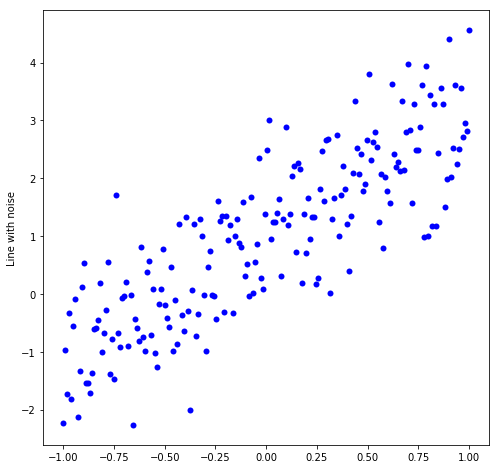

In [1]:
%reset
import numpy as np
trainX = np.linspace(-1,1, 200 ) #200 evenly spaced samples
trainY = (2 * trainX + 1.0 + np.random.randn(*trainX.shape)*0.8)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(8, 8))
plt.plot(trainX, trainY, 'bo', markeredgecolor='none')
plt.ylabel('Line with noise')
plt.show()

In [2]:
import tensorflow as tf


X = tf.placeholder("float", [None, 1])
Y = tf.placeholder("float", [None, 1])

# Set model weights
w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# our model y=xw+b
prediction = X*w + b
loss = tf.reduce_mean(tf.pow(prediction-Y, 2))

var_grads = tf.gradients(loss, [w,b])

learning_rate = tf.constant(0.3)

new_w =  w - var_grads[0] * learning_rate 
new_b =  b - var_grads[1] * learning_rate

update_w = tf.assign(w, new_w)
update_b = tf.assign(b, new_b)

init_op = tf.global_variables_initializer()





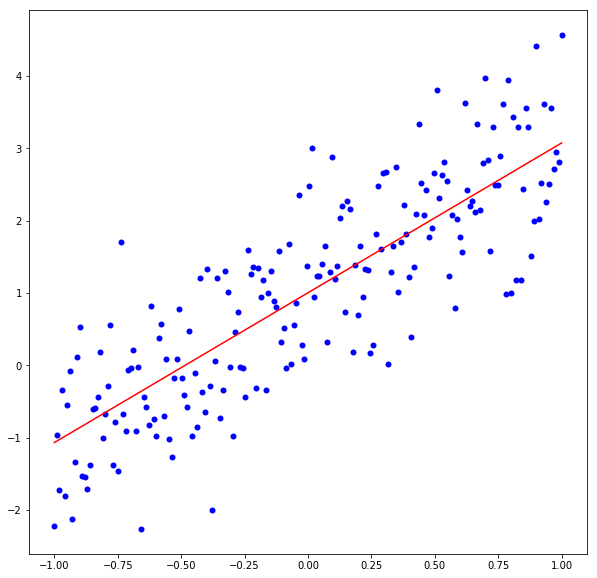

Cost:  0.667029  w: [2.0713215]  b: [1.0017048]


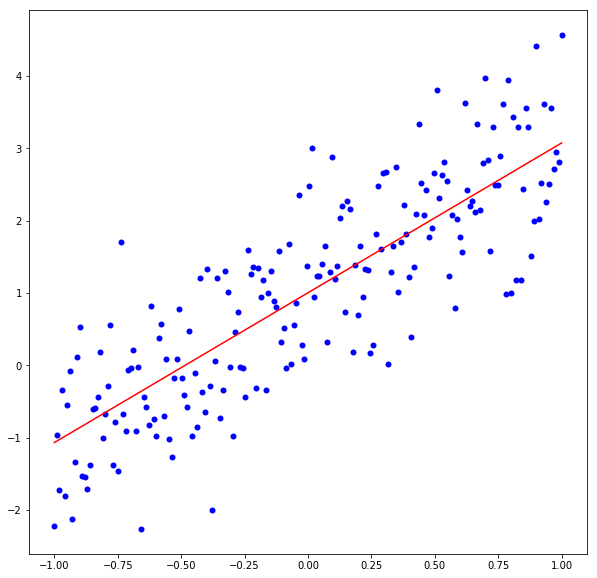

In [4]:
%matplotlib inline
import time
import pylab as plt
from IPython import display

fig = plt.figure( figsize=(10, 10))
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in range(15):
        [current_loss, _, _ ] = sess.run(
                [loss, update_w, update_b ], 
                feed_dict={X:trainX.reshape([-1,1]),
                           Y:trainY.reshape([-1,1])})
        current_w = sess.run([w])
        current_b = sess.run([b])
        

        plt.clf()
        plt.plot(trainX, trainY,'o',color='b', markeredgecolor='none')
        plt.plot(trainX, trainX*current_w + current_b, color='r',)
        print('Cost: ', current_loss,' w:',current_w, ' b:',current_b)
        display.clear_output(wait=True)
        display.display(plt.gcf())

print('Cost: ', current_loss,' w:',current_w, ' b:',current_b)

## CNN example with MNIST

Dataset of images of handwritten digits like these

<div style="width: 400px">
![esto puede in en el style float:left;](https://www.tensorflow.org/images/MNIST.png)
</div>
 Each image is 28 by 28 pixels. Can be interpreted as a matrix:
<div style="width: 200px">
![MNIST Pixels](https://www.tensorflow.org/images/MNIST-Matrix.png)
</div>

<div style="float:left;width: 400px">
![train ](https://www.tensorflow.org/images/mnist-train-xs.png)
</div>

<div style="float:right;width: 500px">
![1hot labels ](https://www.tensorflow.org/images/mnist-train-ys.png)
</div>
<br><br><br><br><br><br><br><br><br>
Images are = [55000, 28 ,28]    
reshaped into [55000, 784]         

Labels are [55000, 10]
(One-hot encoding of classes)


![lenet](http://www.pyimagesearch.com/wp-content/uploads/2016/06/lenet_architecture.png)

In [11]:
%reset
import argparse
import sys
import os
import time
import datetime

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()



mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [12]:
class MNIST_CNN():
    """
    A network for a classifier of digit images.
    Input are 2D grayscale images reshaped into a vector, and the labels
    in one-hot encoding
    Uses 2 Conv Layers, 1 hidden layer and softmax layer.
    """
    def __init__(self, img_length, hidden_layer_size = 256, num_classes=10):
        self.input_x = tf.placeholder(tf.float32, 
                            [None, img_length], name="input_x")
        self.input_y = tf.placeholder(tf.float32, 
                            [None, num_classes], name="input_y")

        # Input Layer
        # Dimesnions are [batch_size, image_width, image_height, channels]
        self.input_layer = tf.reshape(self.input_x, [-1, 28, 28, 1]) 


        # Convolutional Layer #1
        with tf.name_scope("Conv_1"):
            nfilters1=8
            self.W_conv1=tf.Variable(
                tf.truncated_normal([5, 5, 1, nfilters1], stddev=0.1), 
                name="W")
            b = tf.Variable(
                tf.constant(0.1, shape=[nfilters1]), 
                name="b")
            conv_out = tf.nn.conv2d(self.input_layer, self.W_conv1, 
                                 strides=[1, 1, 1, 1], padding='SAME') 
            self.conv1 = tf.nn.relu(conv_out + b)
            self.pool1 = tf.nn.max_pool(self.conv1, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

            
            #self.conv1 = tf.layers.conv2d(
            #      inputs=self.input_layer,
            #      filters=32,
            #      kernel_size=[5, 5],
            #      padding="same",
            #      activation=tf.nn.relu)
            # Pooling Layer #1
            #self.pool1 = tf.layers.max_pooling2d(inputs=self.conv1,
            #pool_size=[2, 2], strides=2)

        # Convolutional Layer #2 and Pooling Layer #2
        with tf.name_scope("Conv_2"):
            nfilters2=16
            self.W_conv2=tf.Variable(
                tf.truncated_normal([3, 3, nfilters1, nfilters2], stddev=0.1), 
                name="W")
            b = tf.Variable(
                tf.constant(0.1, shape=[nfilters2]), 
                name="b")
            
            conv_out = tf.nn.conv2d(self.pool1, self.W_conv2, 
                                 strides=[1, 1, 1, 1], padding='SAME') 
            self.conv2 = tf.nn.relu(conv_out + b)
            self.pool2 = tf.nn.max_pool(self.conv2, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

            #self.conv2 = tf.layers.conv2d(
            #      inputs=self.pool1,
            #      filters=64,
            #      kernel_size=[5, 5],
            #      padding="same",
            #      activation=tf.nn.relu)
            #self.pool2 = tf.layers.max_pooling2d(inputs=self.conv2, pool_size=[2, 2], strides=2)

        #Flat feature maps
        self.pool2_flat = tf.reshape(self.pool2, 
                                     [-1, 7 * 7 * nfilters2])

        # Dense Layer
        with tf.name_scope("hidden_layer_1"):
            W = tf.Variable(
                tf.truncated_normal([7 * 7 * nfilters2, hidden_layer_size], stddev=0.1),
                name="W")
            b = tf.Variable(
                tf.constant(0.1, shape=[hidden_layer_size]), 
                name="b")
            self.hl1 = tf.nn.relu ( tf.matmul(self.pool2_flat, W) + b )
            #dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)



        with tf.name_scope("softmax_layer"):
            W = tf.Variable(
                tf.truncated_normal([hidden_layer_size, num_classes], stddev=0.1), 
                name="W")
            b = tf.Variable(
                tf.constant(0.1, shape=[num_classes]), 
                name="b")
            self.scores = tf.nn.xw_plus_b(self.hl1, W, b, 
                                          name="scores")
            self.predictions = tf.argmax(self.scores, 1, 
                                         name="predictions")


        # CalculateMean cross-entropy loss
        with tf.name_scope("loss"):
            losses = tf.nn.softmax_cross_entropy_with_logits(
                logits=self.scores, labels=self.input_y)
            self.loss = tf.reduce_mean(losses)

        # Accuracy
        with tf.name_scope("accuracy"):
            correct_predictions = tf.equal(self.predictions, 
                                           tf.argmax(self.input_y, 1))
            self.accuracy = tf.reduce_mean(
                tf.cast(correct_predictions, "float"), name="accuracy")


            
            
            

In [13]:
#sess = tf.Session()
sess = tf.InteractiveSession() #for running inside notebook

mnist_dnn = MNIST_CNN(img_length=784, 
                      hidden_layer_size = 128, num_classes=10)

    # Define Training procedure
global_step = tf.Variable(0, name="global_step", trainable=False)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(
    mnist_dnn.loss, global_step=global_step)


In [14]:
from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np

timestamp = str(int(time.time()))
out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
print("Writing to {}\n".format(out_dir))

# Summaries for loss and accuracy
loss_summary = tf.summary.scalar("loss", mnist_dnn.loss)
acc_summary = tf.summary.scalar("accuracy", mnist_dnn.accuracy)


with tf.name_scope('var_summary'):
    for var in tf.trainable_variables():
        with tf.name_scope(var.name.split(':')[0]):
            print(var.name)
            mean = tf.reduce_mean(var)
            tf.summary.scalar('mean', mean)
            with tf.name_scope('stddev'):
                stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('stddev', stddev)
            tf.summary.scalar('max', tf.reduce_max(var))
            tf.summary.scalar('min', tf.reduce_min(var))
            tf.summary.histogram('histogram', var)

with tf.variable_scope('visualization_conv1'):
    # scale weights to [0 1], type is still float
    kernel = mnist_dnn.W_conv1
    x_min = tf.reduce_min(kernel)
    x_max = tf.reduce_max(kernel)
    kernel_0_to_1 = (kernel - x_min) / (x_max - x_min)

    # to tf.image_summary format [batch_size, height, width, channels]
    kernel_transposed = tf.transpose (kernel_0_to_1, [3, 0, 1, 2])

    # this will display random 3 filters from the 32 in conv1
    tf.summary.image('filters', kernel_transposed, max_outputs=16)

with tf.variable_scope('visualization_conv2'):    
    kernel = mnist_dnn.W_conv2
    x_min = tf.reduce_min(kernel)
    x_max = tf.reduce_max(kernel)
    kernel_0_to_1 = (kernel - x_min) / (x_max - x_min)

    # to tf.image_summary format [batch_size, height, width, channels]
    kernel_transposed = tf.transpose (kernel_0_to_1, [3, 0, 1, 2])
    kernel_transposed = tf.slice(kernel_transposed, [0, 0, 0,0], [-1, -1, -1, 1]) 

    # this will display random 3 filters from the 32 in conv1
    tf.summary.image('conv2/filters', kernel_transposed, max_outputs=16)
            
image_features = tf.Variable(tf.truncated_normal([10000, 128], stddev=0.1), trainable=False, name='image_features')
# Train Summaries
#train_summary_op = tf.summary.merge([loss_summary, acc_summary ])
train_summary_op = tf.summary.merge_all()
train_summary_dir = os.path.join(out_dir, "summaries", "train")
train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)



config = projector.ProjectorConfig()
embed= config.embeddings.add()
embed.tensor_name = image_features.name
embed.metadata_path = os.path.join(train_summary_dir + '/metadata.tsv')
embed.sprite.image_path = os.path.join(train_summary_dir + '/mnist_10k_sprite.png')
from shutil import copyfile
copyfile('./mnist_10k_sprite.png', os.path.join(train_summary_dir + '/mnist_10k_sprite.png'))

# Specify the width and height of a single thumbnail.
embed.sprite.single_image_dim.extend([28, 28])
projector.visualize_embeddings(train_summary_writer, config)

def save_metadata(file):
    with open(file, 'w') as f:
        for i in range(10000):
            c = np.nonzero(mnist.test.labels[::1])[1:][0][i]
            f.write('{}\n'.format(c))

save_metadata(embed.metadata_path)
get_image_features_op = tf.assign(image_features, mnist_dnn.hl1)

Writing to /home/csp/repo/deeplearning-tutorials/intro_tensorflow/runs/1490823626

Conv_1/W:0
Conv_1/b:0
Conv_2/W:0
Conv_2/b:0
hidden_layer_1/W:0
hidden_layer_1/b:0
softmax_layer/W:0
softmax_layer/b:0


In [15]:

checkpoint_prefix = os.path.join(train_summary_dir, "model")
if not os.path.exists(checkpoint_prefix):
    os.makedirs(checkpoint_prefix)
saver = tf.train.Saver(tf.global_variables(), max_to_keep=5)

In [16]:
sess.run(tf.global_variables_initializer())


# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(500)
    feed_dict={mnist_dnn.input_x: batch_xs, mnist_dnn.input_y: batch_ys}
    _, step, summaries, loss, accuracy = sess.run(
        [train_op, global_step, train_summary_op, 
         mnist_dnn.loss, mnist_dnn.accuracy],  feed_dict)

    time_str = datetime.datetime.now().isoformat()
    print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
    train_summary_writer.add_summary(summaries, step)

    
    
# Test trained model
print("Test accuracy")
[accuracy, _ ] =sess.run(
    [mnist_dnn.accuracy, get_image_features_op], 
    feed_dict={mnist_dnn.input_x: mnist.test.images,
               mnist_dnn.input_y: mnist.test.labels})
print(accuracy)

path = saver.save(sess, checkpoint_prefix, global_step=step)
print("Saved model checkpoint to {}\n".format(path))    
sess.close()

2017-03-29T23:40:39.115174: step 1, loss 2.30453, acc 0.164
2017-03-29T23:40:39.283402: step 2, loss 2.31818, acc 0.136
2017-03-29T23:40:39.460833: step 3, loss 2.28227, acc 0.188
2017-03-29T23:40:39.642522: step 4, loss 2.26999, acc 0.172
2017-03-29T23:40:39.810121: step 5, loss 2.27837, acc 0.136
2017-03-29T23:40:39.960146: step 6, loss 2.26453, acc 0.21
2017-03-29T23:40:40.118439: step 7, loss 2.25886, acc 0.206
2017-03-29T23:40:40.277039: step 8, loss 2.2425, acc 0.26
2017-03-29T23:40:40.429632: step 9, loss 2.24161, acc 0.276
2017-03-29T23:40:40.573604: step 10, loss 2.21785, acc 0.358
2017-03-29T23:40:40.732068: step 11, loss 2.21931, acc 0.306
2017-03-29T23:40:40.886847: step 12, loss 2.21568, acc 0.336
2017-03-29T23:40:41.058454: step 13, loss 2.2022, acc 0.366
2017-03-29T23:40:41.221271: step 14, loss 2.21093, acc 0.322
2017-03-29T23:40:41.374007: step 15, loss 2.18767, acc 0.412
2017-03-29T23:40:41.513828: step 16, loss 2.18783, acc 0.348
2017-03-29T23:40:41.678151: step 17, 